In [75]:
import scipy
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline


In [4]:
#Importation des données

customers = pd.read_csv("data/customers.csv", sep = ";")
indicators = pd.read_csv("data/indicators.csv", sep = ";")



In [5]:
customers.head()

,ID_CLIENT,DATE_ENTREE,NOM,PAYS,SEXE,AGE,MEMBRE_ACTIF
0,15688172,2015-06-01 00:00:00,Tai,Espagne,H,40,No
1,15787258,2014-04-01 00:00:00,Ross,Espagne,F,29,No
2,15791700,2018-01-01 00:00:00,Ugochukwutubelum,Allemagne,H,47,Yes
3,15569438,2010-01-01 00:00:00,Mai,Allemagne,H,36,No
4,15778947,2017-05-01 00:00:00,Sullivan,France,H,36,Yes


In [6]:
indicators.head()

,ID_CLIENT,BALANCE,NB_PRODUITS,CARTE_CREDIT,SALAIRE,SCORE_CREDIT,CHURN
0,15688172,0.00,2,Yes,88947.56,677.0,No
1,15787258,0.00,14,Yes,NaN,NaN,No
2,15791700,118079.47,4,Yes,143007.49,773.0,Yes
3,15569438,106702.94,2,No,198313.69,607.0,No
4,15778947,0.00,2,Yes,8742.91,628.0,No


In [7]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(customers, 'Overview of the dataset customers')

print("##############")

dataoveriew(indicators, 'Overview of the dataset indicators')

Overview of the dataset customers:

Number of rows:  9950

Number of features: 7

Data Features:
['ID_CLIENT', 'DATE_ENTREE', 'NOM', 'PAYS', 'SEXE', 'AGE', 'MEMBRE_ACTIF']

Missing values: 0

Unique values:
ID_CLIENT       9950
DATE_ENTREE       66
NOM             2928
PAYS               3
SEXE               2
AGE              110
MEMBRE_ACTIF       2
dtype: int64
##############
Overview of the dataset indicators:

Number of rows:  9950

Number of features: 7

Data Features:
['ID_CLIENT', 'BALANCE', 'NB_PRODUITS', 'CARTE_CREDIT', 'SALAIRE', 'SCORE_CREDIT', 'CHURN']

Missing values: 806

Unique values:
ID_CLIENT       9950
BALANCE         6334
NB_PRODUITS        8
CARTE_CREDIT       2
SALAIRE         9720
SCORE_CREDIT     460
CHURN              2
dtype: int64


In [8]:
df_customers = pd.merge(customers, indicators, how = "outer")

In [9]:
dataoveriew(df_customers, 'Overview of the dataset df_customers')


Overview of the dataset df_customers:

Number of rows:  9950

Number of features: 13

Data Features:
['ID_CLIENT', 'DATE_ENTREE', 'NOM', 'PAYS', 'SEXE', 'AGE', 'MEMBRE_ACTIF', 'BALANCE', 'NB_PRODUITS', 'CARTE_CREDIT', 'SALAIRE', 'SCORE_CREDIT', 'CHURN']

Missing values: 806

Unique values:
ID_CLIENT       9950
DATE_ENTREE       66
NOM             2928
PAYS               3
SEXE               2
AGE              110
MEMBRE_ACTIF       2
BALANCE         6334
NB_PRODUITS        8
CARTE_CREDIT       2
SALAIRE         9720
SCORE_CREDIT     460
CHURN              2
dtype: int64


### Visualisation et Nettoyage des données

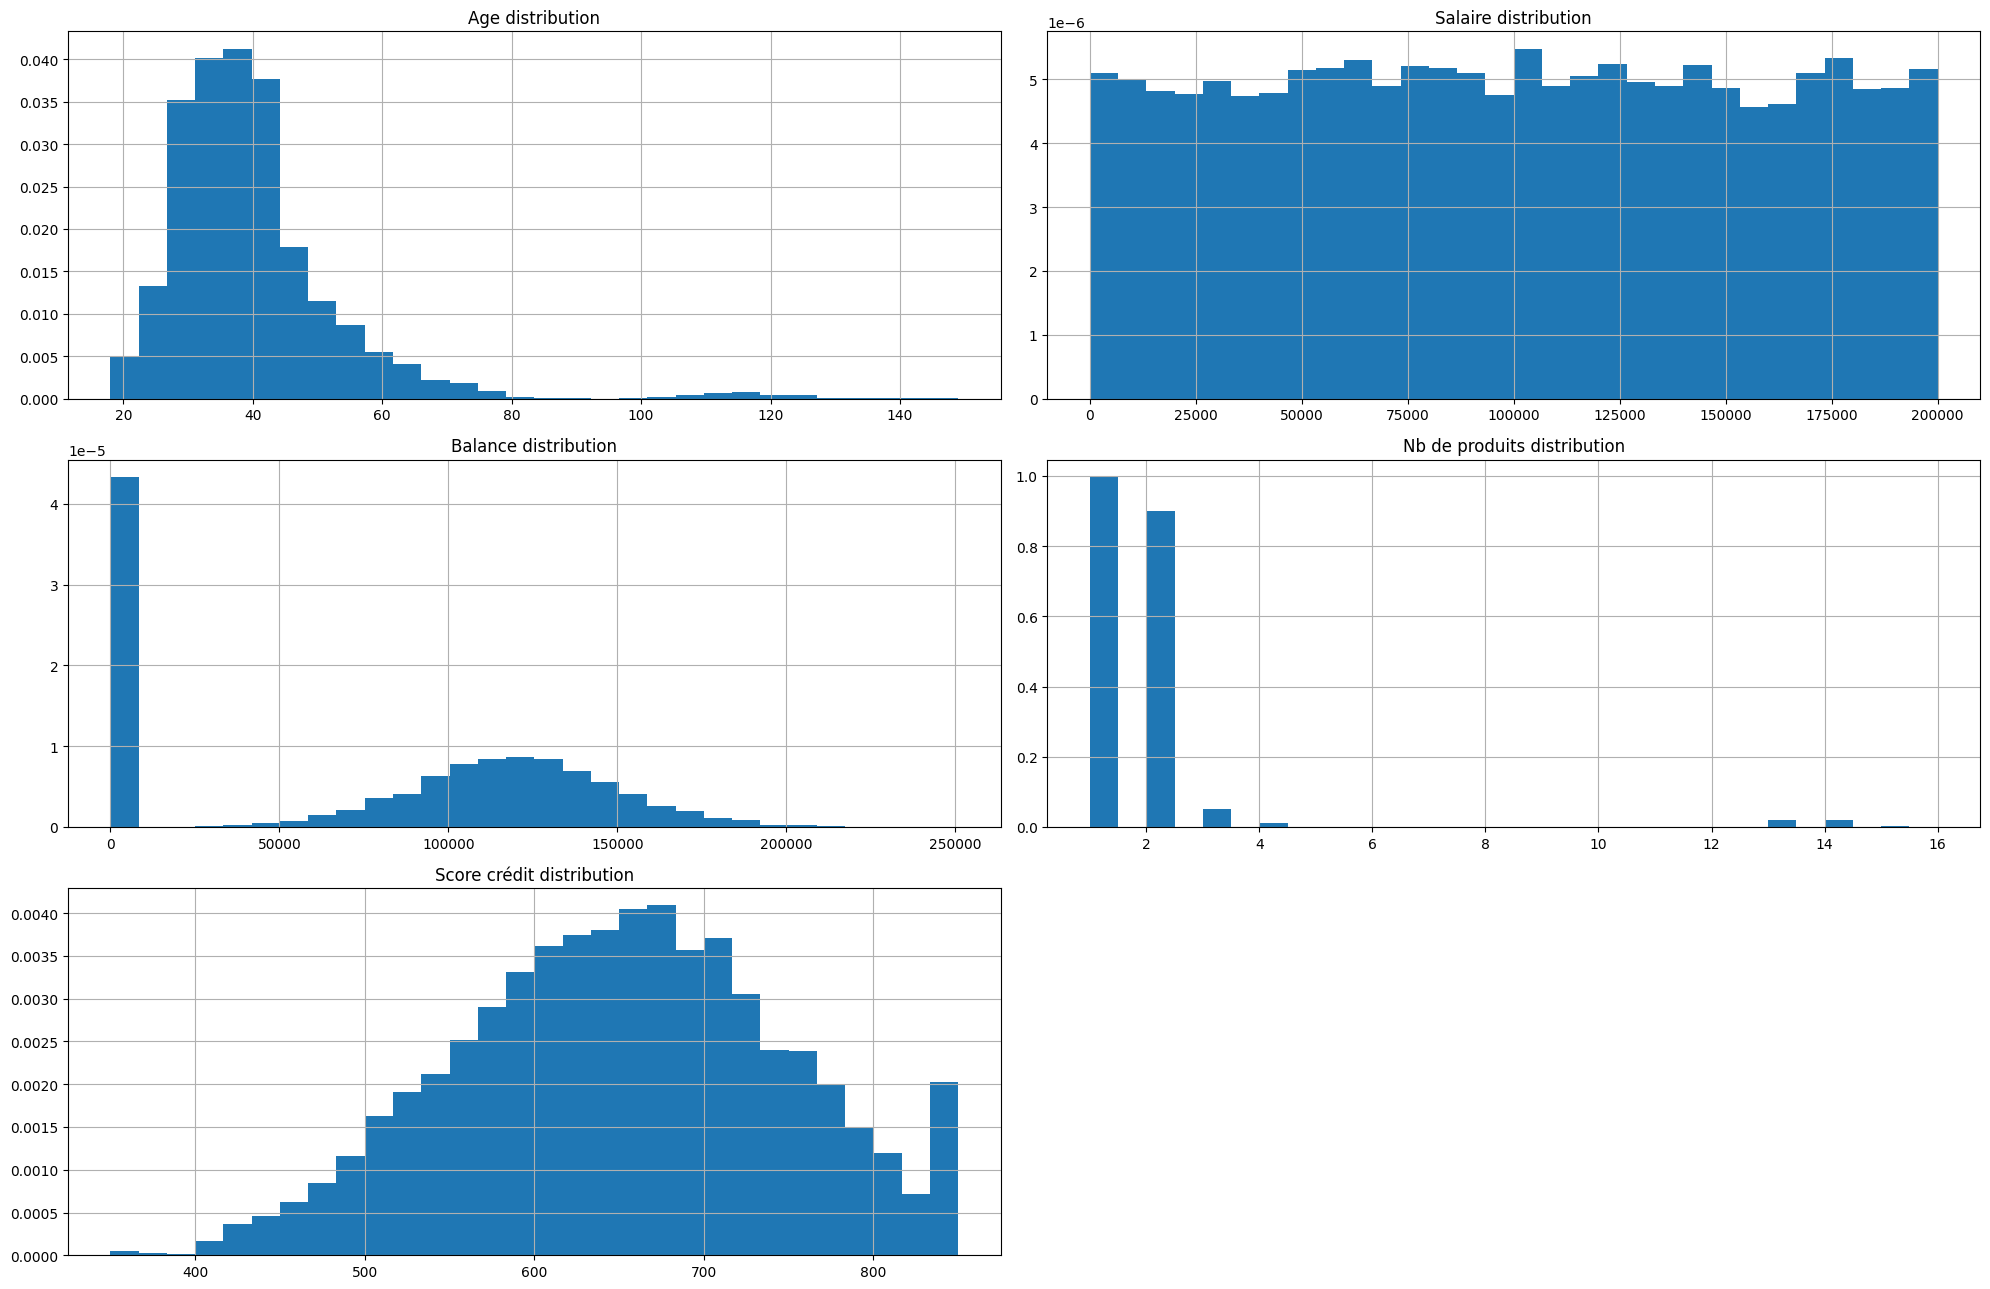

In [10]:
plt.figure(figsize=(20, 13)) # création d'une figure de largeur 12 pouces et hauteur 3 pouces
 
plt.subplot(3, 2, 1) # 3 lignes, 2 colonnes, sous-figure 1
df_customers["AGE"].hist(density = True, bins = 30) 
plt.title("Age distribution")

plt.subplot(3, 2, 2)  # 3 lignes, 2 colonnes, sous-figure 2
df_customers["SALAIRE"].hist(density = True, bins = 30) 
plt.title("Salaire distribution")


plt.subplot(3, 2, 3)  # 3 lignes, 2 colonnes, sous-figure 3
df_customers["BALANCE"].hist(density = True, bins = 30) 
plt.title("Balance distribution")


plt.subplot(3, 2, 4)  # 3 lignes, 2 colonnes, sous-figure 4
df_customers["NB_PRODUITS"].hist(density = True, bins = 30) 
plt.title("Nb de produits distribution")

plt.subplot(3, 2, 5)  # 3 lignes, 2 colonnes, sous-figure 5
df_customers["SCORE_CREDIT"].hist(density = True, bins = 30) 
plt.title("Score crédit distribution")

plt.tight_layout()  

 


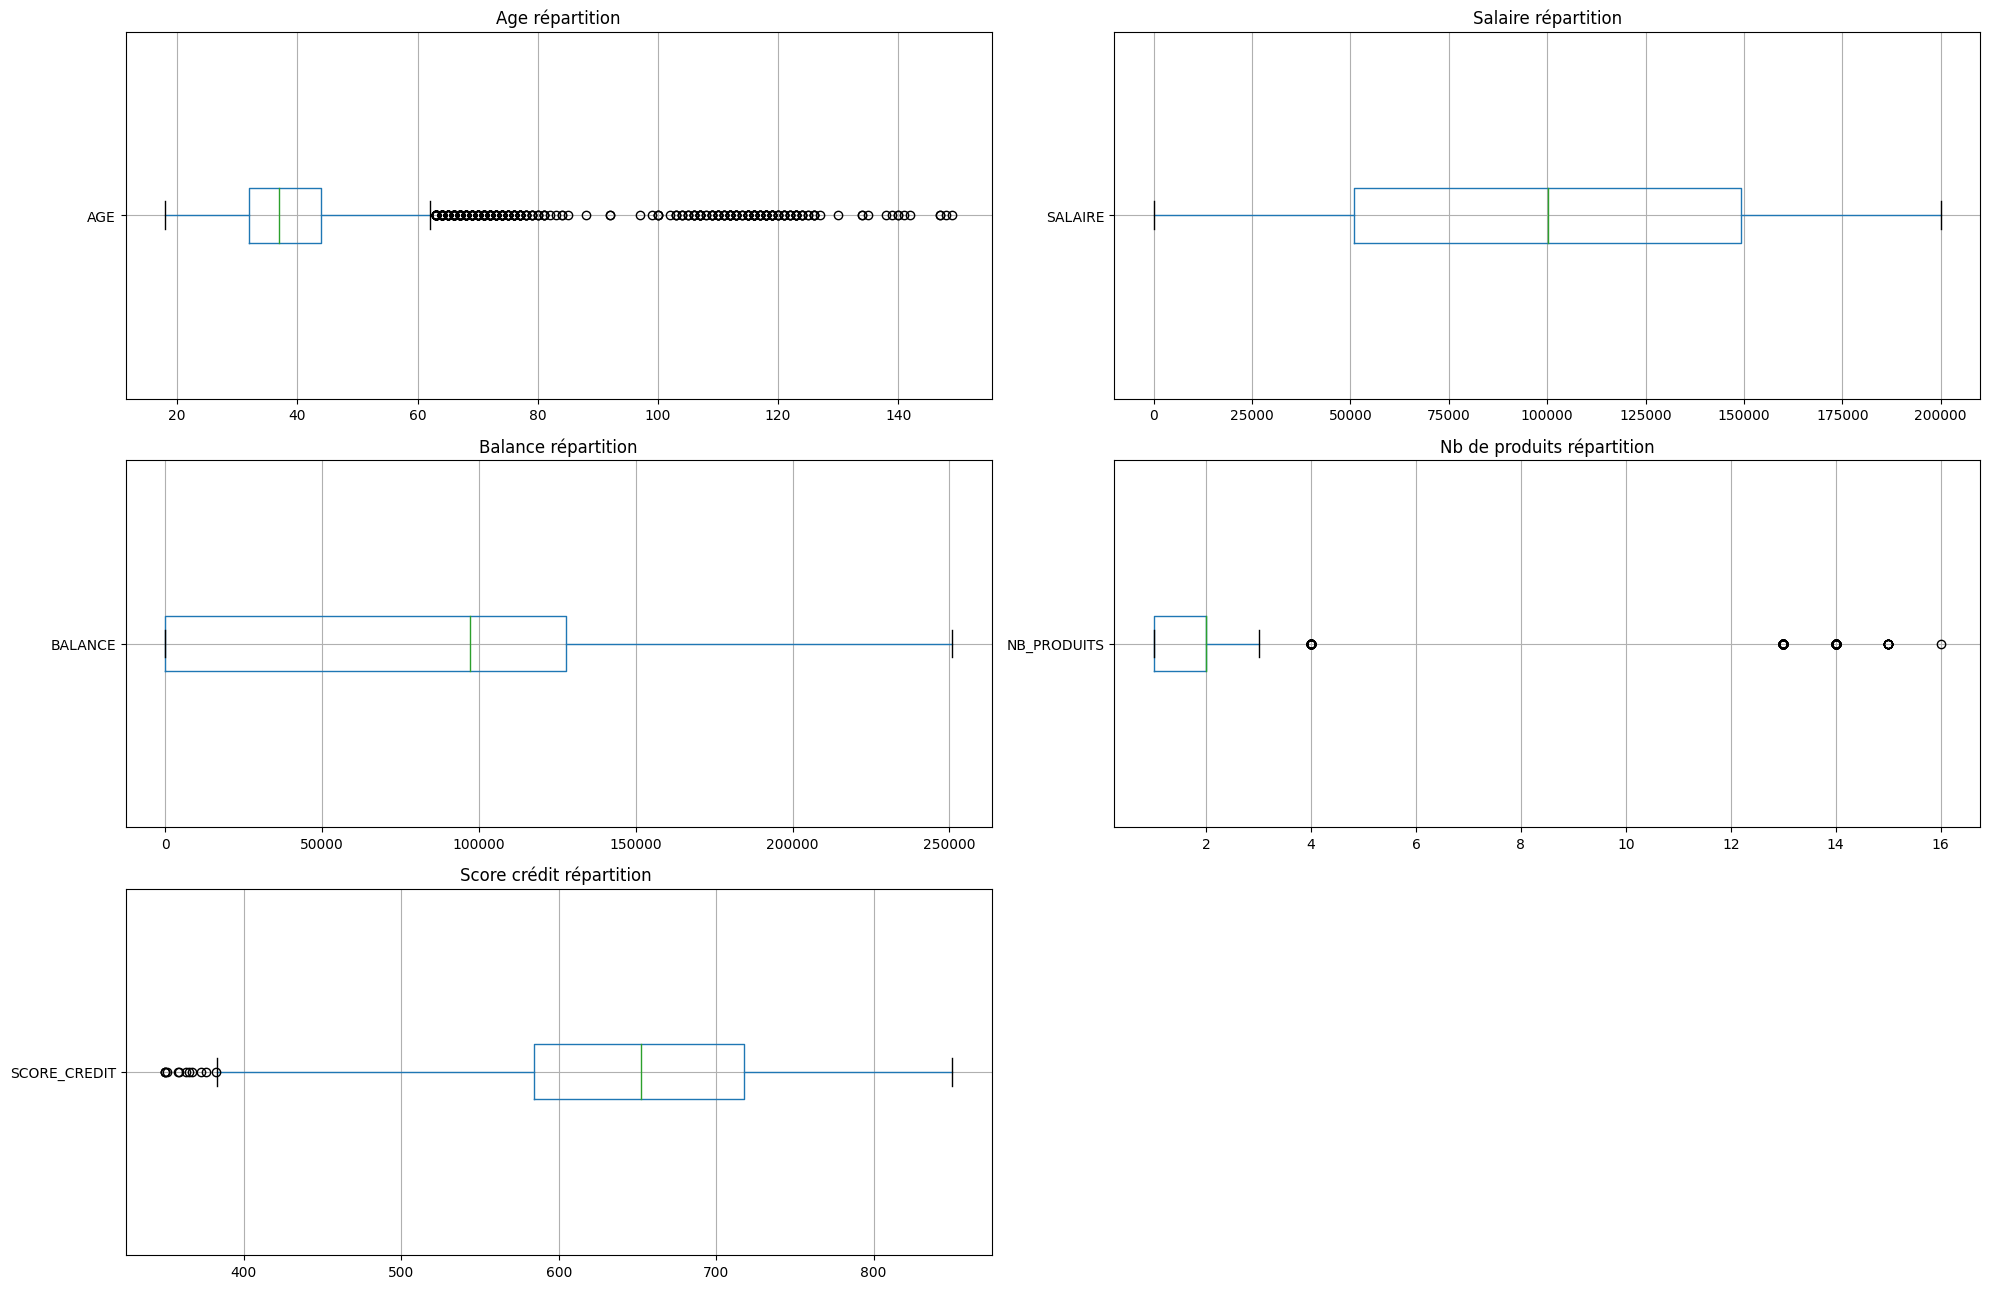

In [11]:
plt.figure(figsize=(20, 13)) # création d'une figure de largeur 12 pouces et hauteur 3 pouces
 
plt.subplot(3, 2, 1) # 3 lignes, 2 colonnes, sous-figure 1
df_customers.boxplot(column = "AGE", vert = False) 
plt.title("Age répartition")

plt.subplot(3, 2, 2)  # 3 lignes, 2 colonnes, sous-figure 2
df_customers.boxplot(column = "SALAIRE",vert = False)
plt.title("Salaire répartition")


plt.subplot(3, 2, 3)  # 3 lignes, 2 colonnes, sous-figure 3
df_customers.boxplot(column = "BALANCE", vert = False) 
plt.title("Balance répartition")


plt.subplot(3, 2, 4)  # 3 lignes, 2 colonnes, sous-figure 4
df_customers.boxplot(column = "NB_PRODUITS", vert = False)
plt.title("Nb de produits répartition")

plt.subplot(3, 2, 5)  # 3 lignes, 2 colonnes, sous-figure 5
df_customers.boxplot(column = "SCORE_CREDIT", vert = False) 
plt.title("Score crédit répartition ")

plt.tight_layout()  

In [12]:
df_customers["BALANCE"] = df_customers["BALANCE"].replace(0, np.nan) #Les 0 de la variable balance 
                                                                     #sont des données manquantes

In [13]:
df_customers.isna().sum() # Ensemble des données manquantes par colonnes

ID_CLIENT          0
DATE_ENTREE        0
NOM                0
PAYS               0
SEXE               0
AGE                0
MEMBRE_ACTIF       0
BALANCE         3615
NB_PRODUITS        0
CARTE_CREDIT       0
SALAIRE          229
SCORE_CREDIT     559
CHURN              0
dtype: int64

<AxesSubplot:>

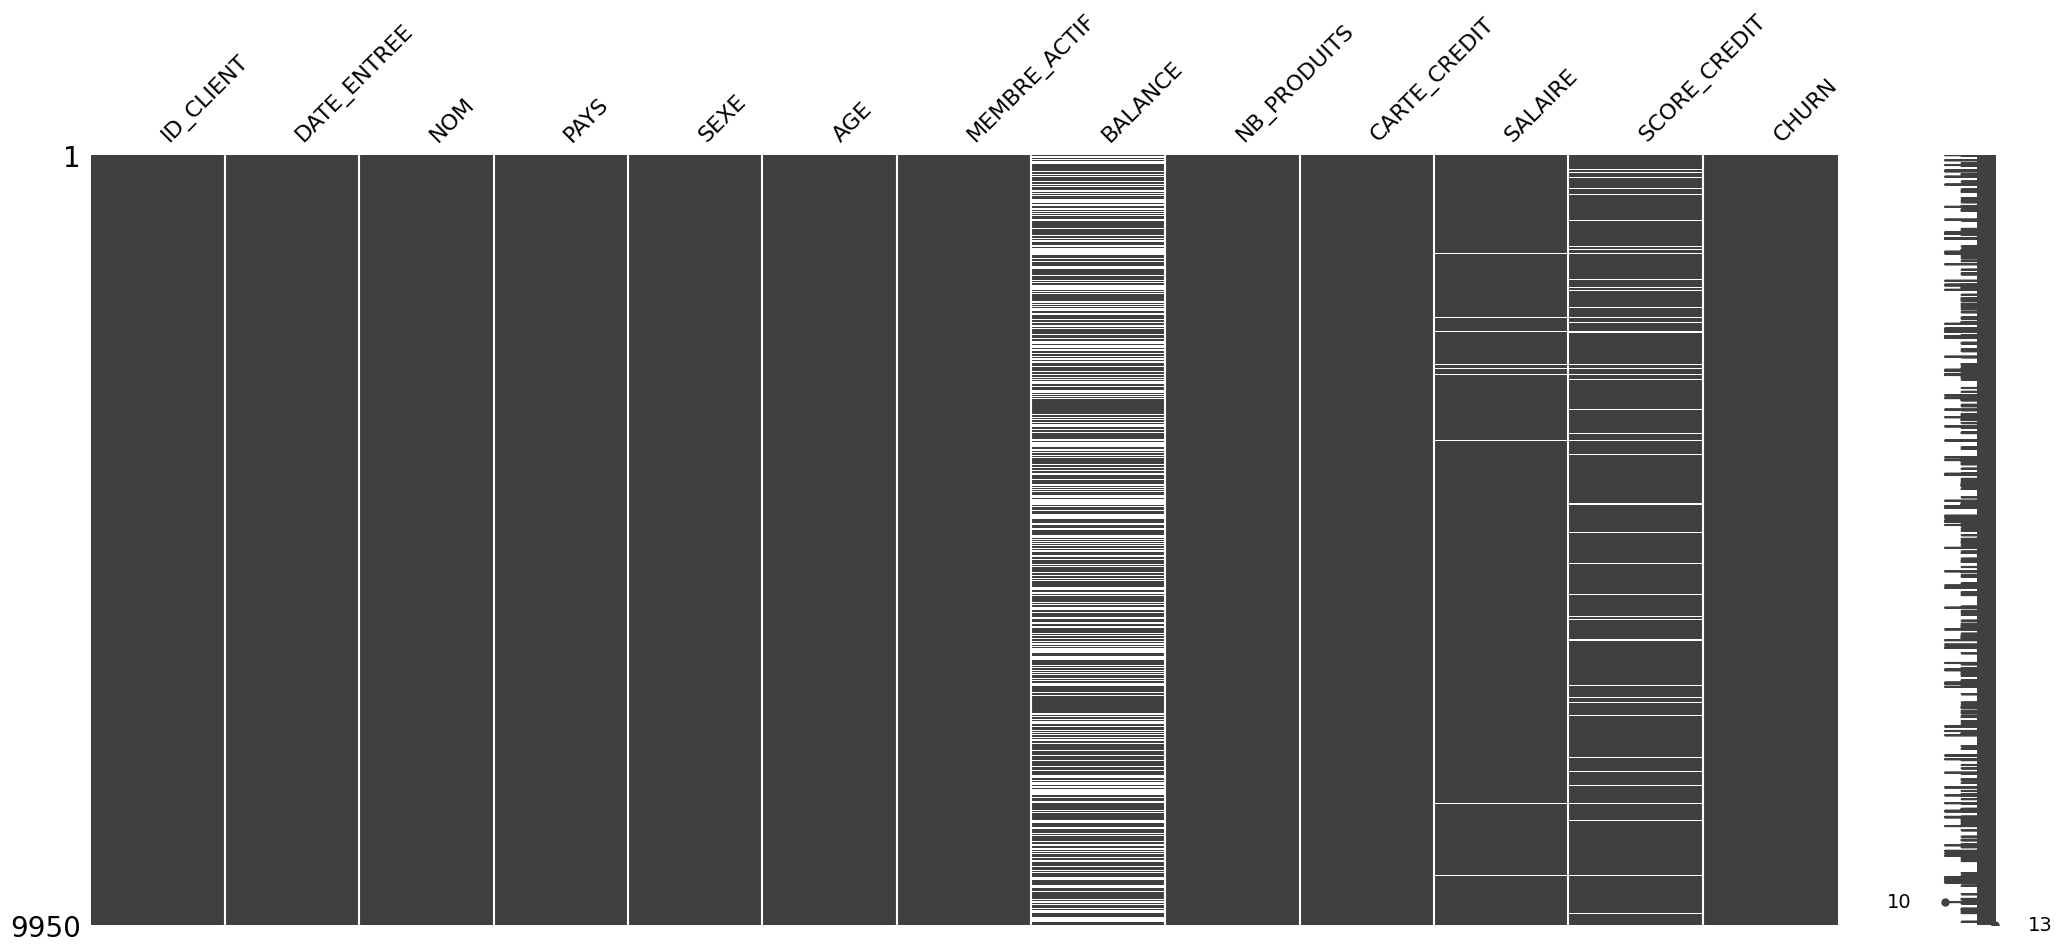

In [14]:
msno.matrix(df_customers)

L’interpolation linéaire est la méthode la plus simple pour estimer la valeur prise par une fonction continue entre deux points déterminés (interpolation). Elle consiste à utiliser pour cela la fonction affine (de la forme $f(x) = m.x + b)$ passant par les deux points déterminés. Cette technique était d'un emploi systématique lorsque l'on ne disposait que de tables numériques pour le calcul avec les fonctions transcendantes : les tables comportaient d'ailleurs à cet effet en marge les « différences tabulaires », auxiliaire de calcul servant à l'interpolation linéaire.

Enfin l'interpolation linéaire est la base de la technique de quadrature numérique par la méthode des trapèzes. 

In [15]:
df_customers["BALANCE"].interpolate(method = "linear", inplace = True) #reste 2 nan à imputer avec la médiane
                                                                       #imputer tous les nans directement
                                                                       #biaise les données
                                                                       #On interpole puis on impute les nan s'ils en restent

In [16]:
df_customers["BALANCE"].fillna(df_customers["BALANCE"].median(), inplace = True)

In [17]:
df_customers["BALANCE"].isna().sum()

0

<AxesSubplot:>

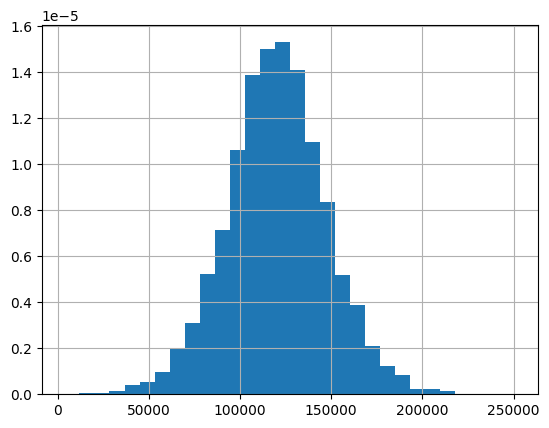

In [18]:
df_customers["BALANCE"].hist(density = True, bins = 30)

In [19]:
df_customers["SALAIRE"].interpolate(method = "linear", inplace = True) #Il ne reste plus de NaNs après l'interpolation

In [20]:
df_customers["SALAIRE"].isna().sum()

0

<AxesSubplot:>

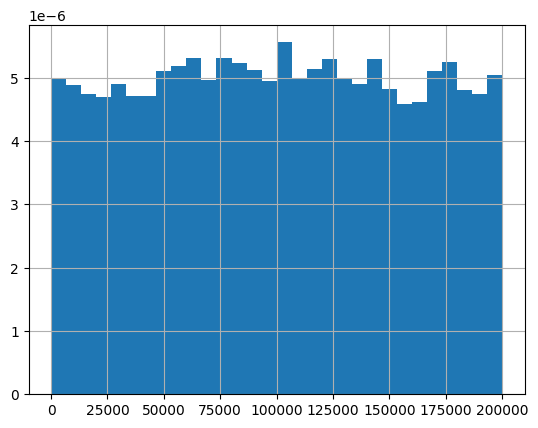

In [21]:
df_customers["SALAIRE"].hist(density = True, bins = 30)

In [22]:
df_customers["SCORE_CREDIT"].interpolate(method = "linear", inplace = True) #Il reste 0 NaNs après l'interpolation

<AxesSubplot:>

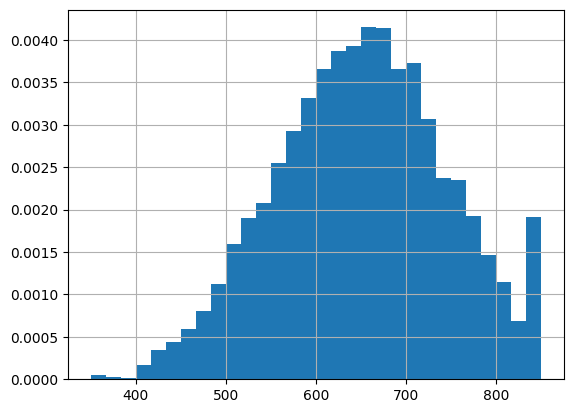

In [23]:
df_customers["SCORE_CREDIT"].hist(density = True, bins = 30)

In [24]:
df_customers.isna().sum() # 0 NaNs

ID_CLIENT       0
DATE_ENTREE     0
NOM             0
PAYS            0
SEXE            0
AGE             0
MEMBRE_ACTIF    0
BALANCE         0
NB_PRODUITS     0
CARTE_CREDIT    0
SALAIRE         0
SCORE_CREDIT    0
CHURN           0
dtype: int64

In [25]:
#Transformations des variables binaires (Yes/No) en variables booléennes
df_customers["CHURN"] = [True if e == "Yes" else False for e in df_customers["CHURN"]]
df_customers["MEMBRE_ACTIF"] = [True if e == "Yes" else False for e in df_customers["MEMBRE_ACTIF"]]
df_customers["CARTE_CREDIT"] = [True if e == "Yes" else False for e in df_customers["CARTE_CREDIT"]]

In [26]:
df_customers.head(10)

,ID_CLIENT,DATE_ENTREE,NOM,PAYS,SEXE,AGE,MEMBRE_ACTIF,BALANCE,NB_PRODUITS,CARTE_CREDIT,SALAIRE,SCORE_CREDIT,CHURN
0,15688172,2015-06-01 00:00:00,Tai,Espagne,H,40,False,120032.470,2,True,88947.560,677.0,False
1,15787258,2014-04-01 00:00:00,Ross,Espagne,F,29,False,120032.470,14,True,115977.525,725.0,False
2,15791700,2018-01-01 00:00:00,Ugochukwutubelum,Allemagne,H,47,True,118079.470,4,True,143007.490,773.0,True
3,15569438,2010-01-01 00:00:00,Mai,Allemagne,H,36,False,106702.940,2,False,198313.690,607.0,False
4,15778947,2017-05-01 00:00:00,Sullivan,France,H,36,True,120189.795,2,True,8742.910,628.0,False
5,15686780,2019-03-01 00:00:00,Rogova,Espagne,F,55,True,133676.650,1,False,17095.490,645.0,False
6,15631222,2018-04-01 00:00:00,Cattaneo,France,F,39,True,75339.640,1,True,70665.160,485.0,False
7,15775235,2014-04-01 00:00:00,Ku,France,F,36,False,110480.480,1,False,81292.330,690.0,False
8,15684248,2013-02-01 00:00:00,Meng,Espagne,H,21,True,108994.705,2,False,154279.870,658.0,False
9,15640953,2018-04-01 00:00:00,Bligh,France,F,26,True,107508.930,2,True,84216.010,667.0,False


In [27]:
#Traitement de la variable DATE_ENTREE du format string au format datetime

df_customers["DATE_ENTREE"] = [datetime.strptime(e, '%Y-%d-%m %H:%M:%S') for e in df_customers["DATE_ENTREE"]]

In [28]:
df_customers["DATE_ENTREE"] #datetime type

0      2015-01-06
1      2014-01-04
2      2018-01-01
3      2010-01-01
4      2017-01-05
          ...    
9945   2013-01-01
9946   2019-01-03
9947   2015-01-01
9948   2016-01-02
9949   2011-01-04
Name: DATE_ENTREE, Length: 9950, dtype: datetime64[ns]

In [29]:
print(df_customers["PAYS"].unique())
print("Seulement", df_customers["NOM"].unique().size,
      "noms uniques dans les données sur", df_customers["NOM"].size)
print("Seulement", df_customers["DATE_ENTREE"].unique().size,
      "dates uniques sur", df_customers["DATE_ENTREE"].size )

['Espagne' 'Allemagne' 'France']
Seulement 2928 noms uniques dans les données sur 9950
Seulement 66 dates uniques sur 9950


In [30]:
df_customers["NOM"].value_counts()

Smith         32
Scott         29
Martin        29
Walker        28
Shih          25
              ..
Bronner        1
Purdy          1
Kisch          1
Maconochie     1
Kinlaw         1
Name: NOM, Length: 2928, dtype: int64

### Features Engineering et ajouts de nouvelles variables

In [31]:
CAC = pd.read_csv("data/CAC 40 Historical Data.csv")
DAX = pd.read_csv("data/DAX Historical Data.csv")
IBEX = pd.read_csv("data/IBEX 35 Historical Data.csv")

In [32]:
CAC["Date"] = [datetime.strptime(e, '%m/%d/%Y') for e in CAC["Date"]]
DAX["Date"] = [datetime.strptime(e, '%m/%d/%Y') for e in DAX["Date"]]
IBEX["Date"] = [datetime.strptime(e, '%m/%d/%Y') for e in IBEX["Date"]]

In [33]:
IBEX.sort_values(by = "Date", inplace = True)
CAC.sort_values(by = "Date", inplace = True)
DAX.sort_values(by = "Date", inplace = True)

In [34]:
IBEX = IBEX.iloc[:,:2]
DAX = DAX.iloc[:,:2]
CAC = CAC.iloc[:,:2]

In [35]:
IBEX = IBEX.rename(columns = {"Date" : "DATE_ENTREE", "Price" : "IBEX_Price"})
DAX = DAX.rename(columns = {"Date" : "DATE_ENTREE", "Price" : "DAX_Price"})
CAC = CAC.rename(columns = {"Date" : "DATE_ENTREE", "Price" : "CAC_Price"})

In [36]:
print(CAC, DAX, IBEX, sep = "\n")

     DATE_ENTREE  CAC_Price
3052  2009-12-30    3935.50
3051  2009-12-31    3936.33
3050  2010-01-04    4013.97
3049  2010-01-05    4012.91
3048  2010-01-06    4017.67
...          ...        ...
4     2021-11-24    7042.23
3     2021-11-25    7075.87
2     2021-11-26    6739.73
1     2021-11-29    6776.25
0     2021-11-30    6721.16

[3053 rows x 2 columns]
     DATE_ENTREE  DAX_Price
2981  2009-12-30    5957.43
2980  2010-01-04    6048.30
2979  2010-01-05    6031.86
2978  2010-01-06    6034.33
2977  2010-01-07    6019.36
...          ...        ...
4     2021-09-24   15531.75
3     2021-09-27   15573.88
2     2021-09-28   15248.56
1     2021-09-29   15365.27
0     2021-09-30   15260.69

[2982 rows x 2 columns]
     DATE_ENTREE  IBEX_Price
3050  2009-12-30     11940.0
3049  2010-01-04     12145.1
3048  2010-01-05     12204.4
3047  2010-01-06     12222.5
3046  2010-01-07     12166.3
...          ...         ...
4     2021-11-24      8792.0
3     2021-11-25      8840.9
2     2021-11-26 

In [37]:
df_customers = pd.merge(df_customers, DAX, how = "left")#.sort_values(by = "DATE_ENTREE")
df_customers = pd.merge(df_customers, IBEX, how = "left")#.sort_values(by = "DATE_ENTREE")
df_customers = pd.merge(df_customers, CAC, how = "left")#.sort_values(by = "DATE_ENTREE")

<AxesSubplot:>

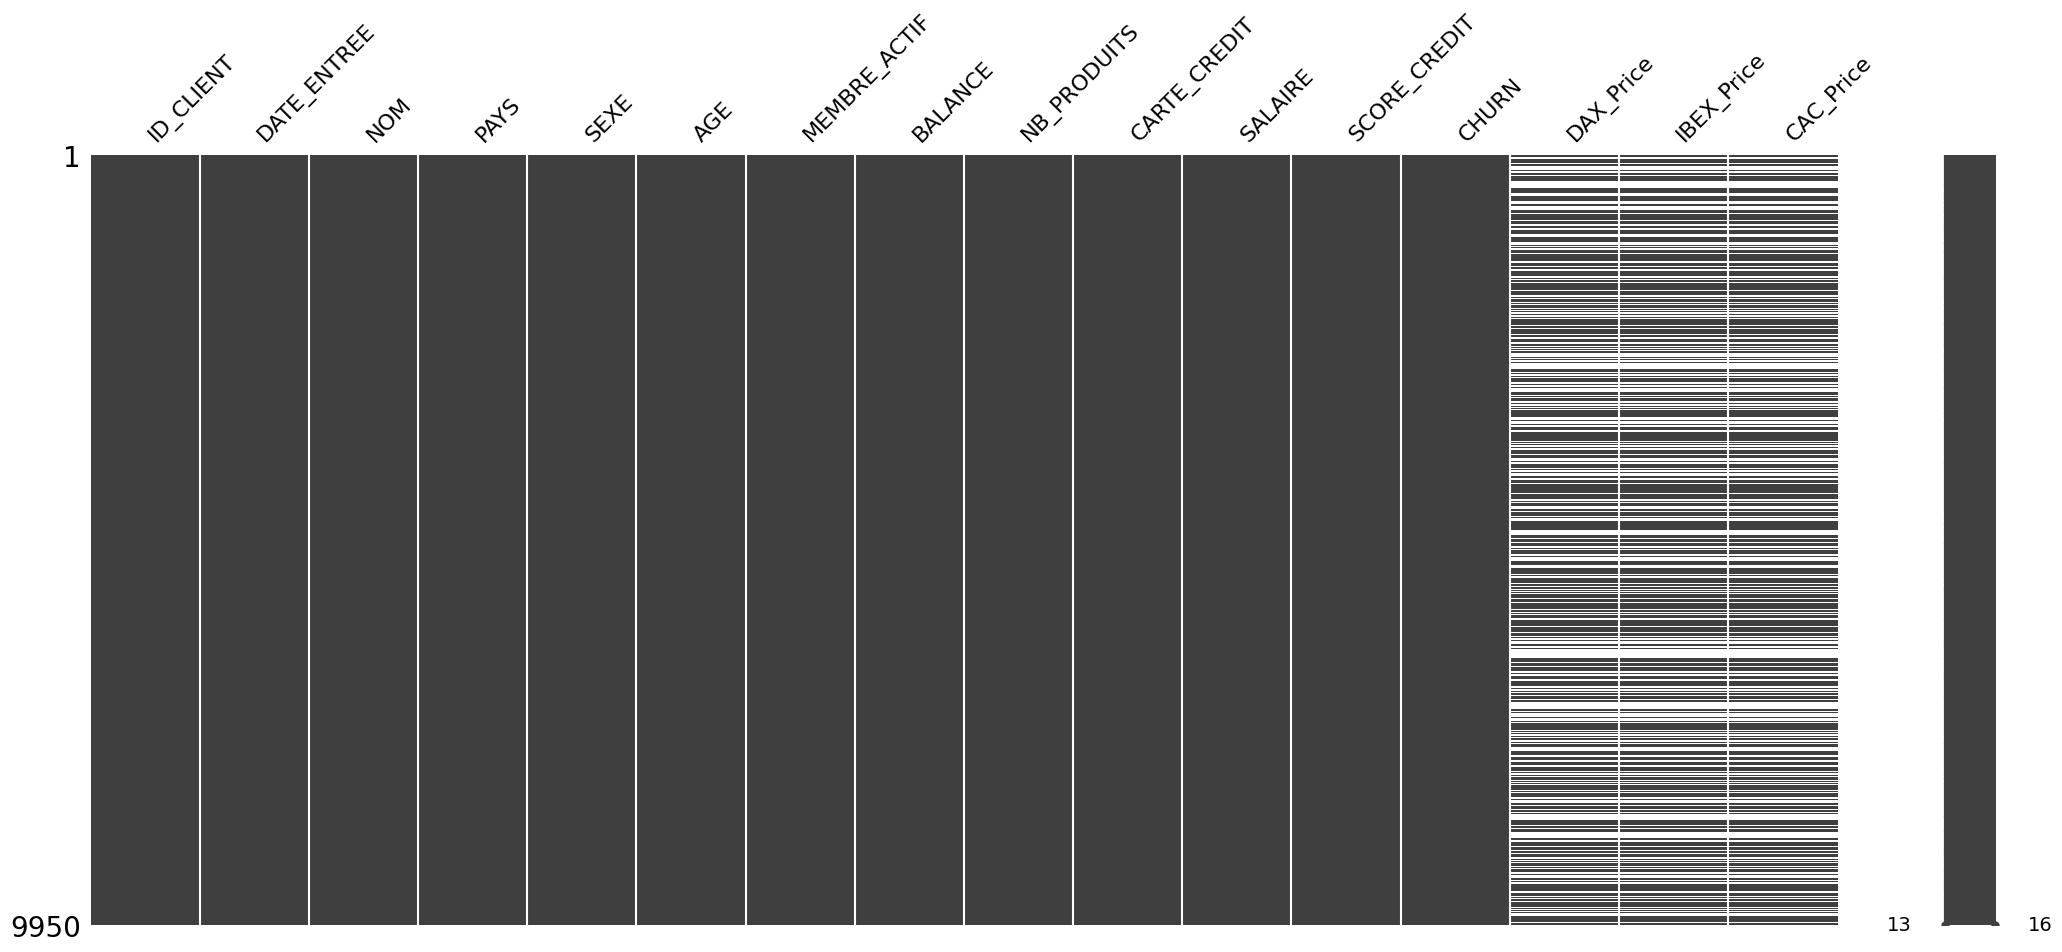

In [38]:
msno.matrix(df_customers)

In [39]:
df_customers["DAX_Price"].interpolate(method = "spline", order = 2, inplace = True)
df_customers["IBEX_Price"].interpolate(method = "spline", order = 2, inplace = True)
df_customers["CAC_Price"].interpolate(method = "spline", order = 2, inplace = True)

/home/ubuntu/PythonProject/PythonProject_env/lib/python3.10/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Text(0.5, 1.0, 'CAC Price distribution')

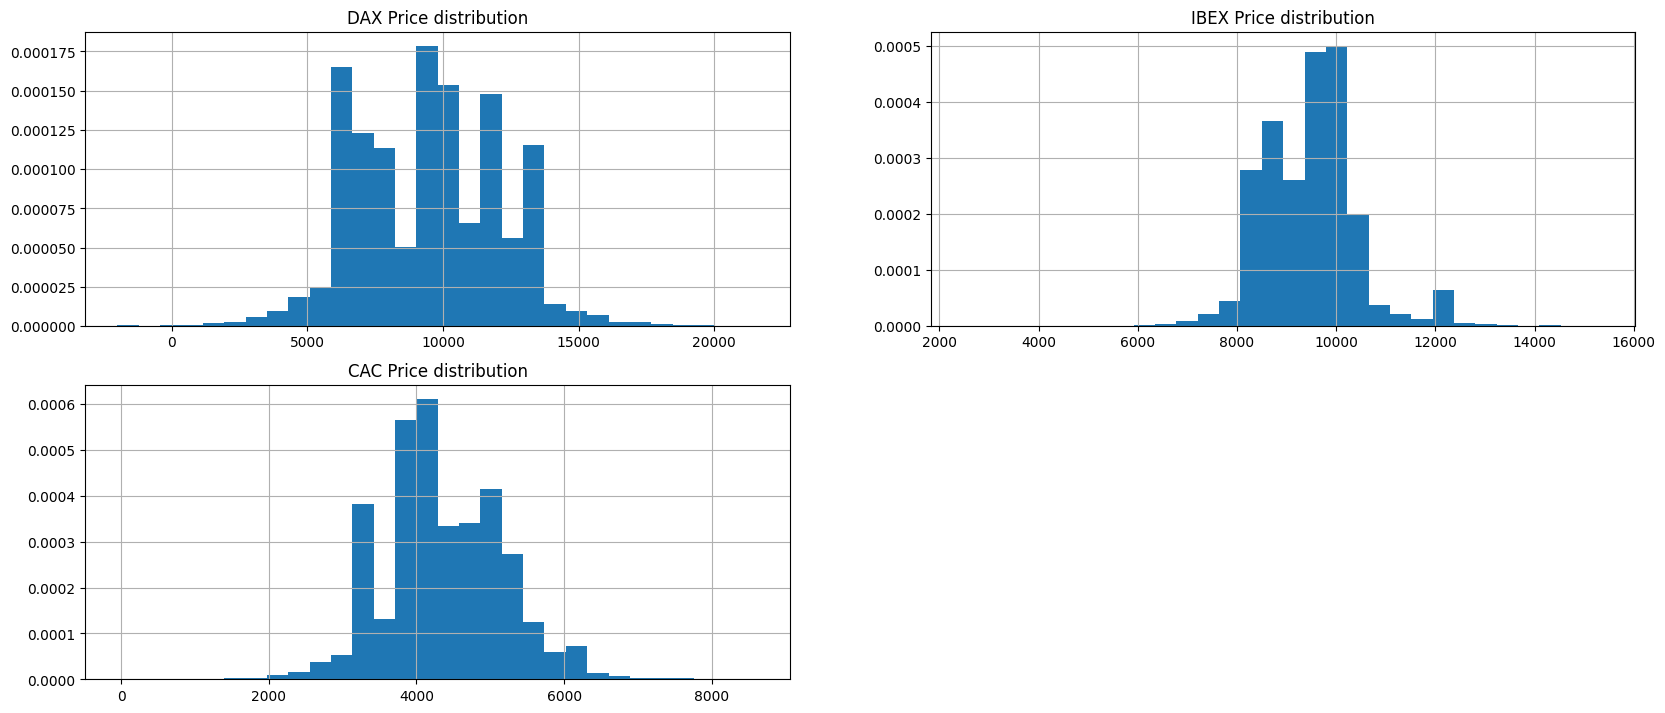

In [40]:
plt.figure(figsize=(20, 13)) # création d'une figure de largeur 12 pouces et hauteur 3 pouces
 
plt.subplot(3, 2, 1) # 3 lignes, 2 colonnes, sous-figure 1
df_customers["DAX_Price"].hist(density = True, bins = 30) 
plt.title("DAX Price distribution")

plt.subplot(3, 2, 2)  # 3 lignes, 2 colonnes, sous-figure 2
df_customers["IBEX_Price"].hist(density = True, bins = 30) 
plt.title("IBEX Price distribution")


plt.subplot(3, 2, 3)  # 3 lignes, 2 colonnes, sous-figure 3
df_customers["CAC_Price"].hist(density = True, bins = 30) 
plt.title("CAC Price distribution")


In [41]:
df_customers.isna().sum()

ID_CLIENT       0
DATE_ENTREE     0
NOM             0
PAYS            0
SEXE            0
AGE             0
MEMBRE_ACTIF    0
BALANCE         0
NB_PRODUITS     0
CARTE_CREDIT    0
SALAIRE         0
SCORE_CREDIT    0
CHURN           0
DAX_Price       0
IBEX_Price      0
CAC_Price       0
dtype: int64

In [42]:
df_customers.head(10)

,ID_CLIENT,DATE_ENTREE,NOM,PAYS,SEXE,AGE,MEMBRE_ACTIF,BALANCE,NB_PRODUITS,CARTE_CREDIT,SALAIRE,SCORE_CREDIT,CHURN,DAX_Price,IBEX_Price,CAC_Price
0,15688172,2015-01-06,Tai,Espagne,H,40,False,120032.470,2,True,88947.560,677.0,False,9469.660000,9871.100000,4083.500000
1,15787258,2014-01-04,Ross,Espagne,F,29,False,120032.470,14,True,115977.525,725.0,False,11597.702838,10670.745358,4747.897927
2,15791700,2018-01-01,Ugochukwutubelum,Allemagne,H,47,True,118079.470,4,True,143007.490,773.0,True,12659.535682,10873.465153,5105.494964
3,15569438,2010-01-01,Mai,Allemagne,H,36,False,106702.940,2,False,198313.690,607.0,False,12655.168588,10479.261474,5156.300624
4,15778947,2017-01-05,Sullivan,France,H,36,True,120189.795,2,True,8742.910,628.0,False,11584.940000,9488.200000,4900.640000
5,15686780,2019-01-03,Rogova,Espagne,F,55,True,133676.650,1,False,17095.490,645.0,False,10416.660000,8523.300000,4611.490000
6,15631222,2018-01-04,Cattaneo,France,F,39,True,75339.640,1,True,70665.160,485.0,False,13167.890000,10314.400000,5413.690000
7,15775235,2014-01-04,Ku,France,F,36,False,110480.480,1,False,81292.330,690.0,False,9967.342520,9415.786004,4401.980688
8,15684248,2013-01-02,Meng,Espagne,H,21,True,108994.705,2,False,154279.870,658.0,False,7778.780000,8447.600000,3733.930000
9,15640953,2018-01-04,Bligh,France,F,26,True,107508.930,2,True,84216.010,667.0,False,13167.890000,10314.400000,5413.690000


In [43]:
#Création de features à partir de la variable "DATE_ENTREE"

df_customers["Weekday_name"] = df_customers["DATE_ENTREE"].dt.day_name()
df_customers["Weekday"] = df_customers["DATE_ENTREE"].dt.weekday
df_customers["Month_name"] = df_customers["DATE_ENTREE"].dt.month_name()
df_customers["Month"] = df_customers["DATE_ENTREE"].dt.month
df_customers["Weekend"] = np.where(df_customers["Weekday_name"].isin(["Saturday", "Sunday"]), 1,0)

In [44]:
df_customers.head()

,ID_CLIENT,DATE_ENTREE,NOM,PAYS,SEXE,AGE,MEMBRE_ACTIF,BALANCE,NB_PRODUITS,CARTE_CREDIT,...,SCORE_CREDIT,CHURN,DAX_Price,IBEX_Price,CAC_Price,Weekday_name,Weekday,Month_name,Month,Weekend
0,15688172,2015-01-06,Tai,Espagne,H,40,False,120032.470,2,True,...,677.0,False,9469.660000,9871.100000,4083.500000,Tuesday,1,January,1,0
1,15787258,2014-01-04,Ross,Espagne,F,29,False,120032.470,14,True,...,725.0,False,11597.702838,10670.745358,4747.897927,Saturday,5,January,1,1
2,15791700,2018-01-01,Ugochukwutubelum,Allemagne,H,47,True,118079.470,4,True,...,773.0,True,12659.535682,10873.465153,5105.494964,Monday,0,January,1,0
3,15569438,2010-01-01,Mai,Allemagne,H,36,False,106702.940,2,False,...,607.0,False,12655.168588,10479.261474,5156.300624,Friday,4,January,1,0
4,15778947,2017-01-05,Sullivan,France,H,36,True,120189.795,2,True,...,628.0,False,11584.940000,9488.200000,4900.640000,Thursday,3,January,1,0


### PCA before KMEANS


<img src="image/pcabeforekmeans.png" width="600" align="left"/>


In [46]:
df_customers.columns

Index(['ID_CLIENT', 'DATE_ENTREE', 'NOM', 'PAYS', 'SEXE', 'AGE',
       'MEMBRE_ACTIF', 'BALANCE', 'NB_PRODUITS', 'CARTE_CREDIT', 'SALAIRE',
       'SCORE_CREDIT', 'CHURN', 'DAX_Price', 'IBEX_Price', 'CAC_Price',
       'Weekday_name', 'Weekday', 'Month_name', 'Month', 'Weekend'],
      dtype='object')

In [171]:
#DataFrame contenant les variables numériques
df_customers_num = df_customers[["BALANCE", "SCORE_CREDIT","SALAIRE", "DAX_Price", "IBEX_Price", "CAC_Price"]]

In [172]:
df_customers_num

,BALANCE,SCORE_CREDIT,SALAIRE,DAX_Price,IBEX_Price,CAC_Price
0,120032.4700,677.0,88947.560,9469.660000,9871.100000,4083.500000
1,120032.4700,725.0,115977.525,11597.702838,10670.745358,4747.897927
2,118079.4700,773.0,143007.490,12659.535682,10873.465153,5105.494964
3,106702.9400,607.0,198313.690,12655.168588,10479.261474,5156.300624
4,120189.7950,628.0,8742.910,11584.940000,9488.200000,4900.640000
...,...,...,...,...,...,...
9945,124540.2800,755.0,188850.890,11698.832725,8856.578006,4970.585554
9946,125258.8475,589.0,61108.560,10416.660000,8523.300000,4611.490000
9947,125977.4150,759.0,22303.170,9202.097057,8584.177840,4316.117572
9948,126695.9825,689.0,136610.020,8054.972571,9039.211085,4084.273499


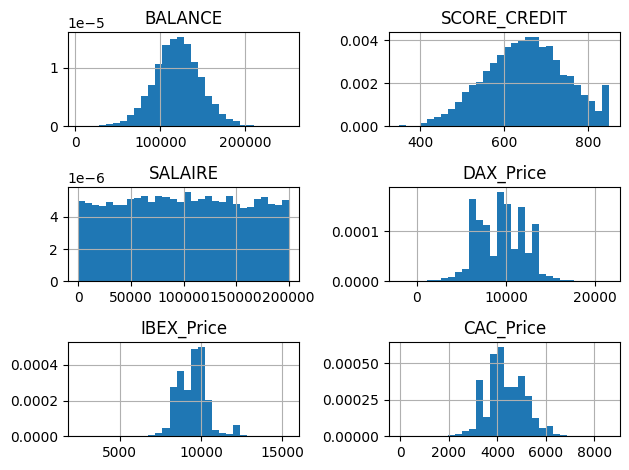

In [173]:
df_customers_num.hist(bins = 30, density = True)
plt.tight_layout()

In [174]:
df_mean = df_customers_num.mean()

In [175]:
list_mean = df_mean.to_list()

In [176]:
list_mean

[120075.04310502512,
 650.7470351758794,
 100119.47400854272,
 9446.85897147515,
 9461.607224922585,
 4336.600810149214]

In [177]:
df_customers_standardized = (df_customers_num - df_customers_num.mean())/df_customers_num.std()

In [178]:
df_customers_standardized

,BALANCE,SCORE_CREDIT,SALAIRE,DAX_Price,IBEX_Price,CAC_Price
0,-0.001558,0.276098,-0.195256,0.008469,0.425515,-0.309773
1,-0.001558,0.780906,0.277158,0.798855,1.256448,0.503392
2,-0.073013,1.285715,0.749571,1.193236,1.467099,0.941060
3,-0.489250,-0.460081,1.716180,1.191614,1.057472,1.003242
4,0.004198,-0.239227,-1.597025,0.794115,0.027633,0.690335
...,...,...,...,...,...,...
9945,0.163371,1.096412,1.550795,0.836417,-0.628702,0.775942
9946,0.189662,-0.649384,-0.681810,0.360199,-0.975020,0.336441
9947,0.215952,1.138479,-1.360027,-0.090908,-0.911760,-0.025070
9948,0.242243,0.402300,0.637760,-0.516967,-0.438923,-0.308827


In [179]:
matrix_customers = df_customers_standardized.to_numpy()

In [180]:
X = matrix_customers

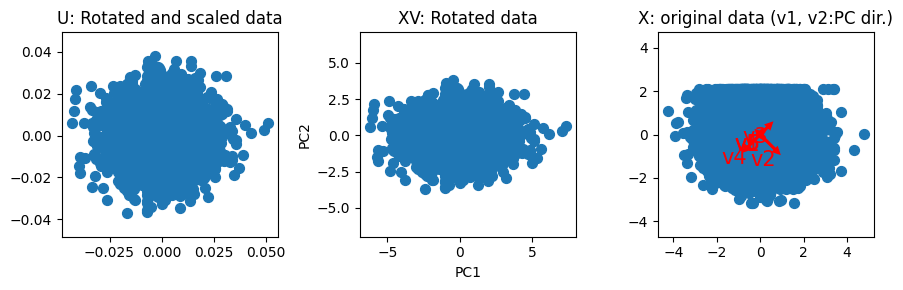

In [181]:
# PCA using SVD
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)

# U : Unitary matrix having left singular vectors as columns.
#     Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on
#     full_matrices.
#
# s : The singular values, sorted in non-increasing order. Of shape (n_comps,), 
#     with n_comps = min(n_samples, n_features).
#
# Vh: Unitary matrix having right singular vectors as rows. 
#     Of shape (n_features, n_features) or (n_comps, n_features) depending 
# on full_matrices.

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(U[:, 0], U[:, 1],  s=50)
plt.axis('equal')
plt.title("U: Rotated and scaled data")

plt.subplot(132)

# Project data
PC = np.dot(X, Vh.T)
plt.scatter(PC[:, 0], PC[:, 1], s=50)
plt.axis('equal')
plt.title("XV: Rotated data")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], s=50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2, 
              head_length=0.2, linewidth=2, fc='r', ec='r')
    plt.text(Vh[i, 0], Vh[i, 1],'v%i' % (i+1), color="r", fontsize=15,
             horizontalalignment='right', verticalalignment='top')
plt.axis('equal')
plt.ylim(-4, 4)

plt.title("X: original data (v1, v2:PC dir.)")

           
plt.tight_layout()

In [182]:
U.shape

(9950, 6)

In [183]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1','principal component 2'])

In [184]:
Y = indicators["CHURN"]

In [185]:
indicators.head()

,ID_CLIENT,BALANCE,NB_PRODUITS,CARTE_CREDIT,SALAIRE,SCORE_CREDIT,CHURN
0,15688172,0.00,2,Yes,88947.56,677.0,No
1,15787258,0.00,14,Yes,NaN,NaN,No
2,15791700,118079.47,4,Yes,143007.49,773.0,Yes
3,15569438,106702.94,2,No,198313.69,607.0,No
4,15778947,0.00,2,Yes,8742.91,628.0,No


In [186]:
finalDf = pd.concat([principalDf, Y], axis = 1)

In [187]:
finalDf

,principal component 1,principal component 2,CHURN
0,0.059860,-0.209371,No
1,-1.295987,-0.561316,No
2,-1.929933,-0.961170,Yes
3,-1.824497,-0.013321,No
4,-0.982806,0.193007,No
...,...,...,...
9945,-0.880097,-0.621710,No
9946,-0.122144,0.624459,Yes
9947,0.382787,-0.632344,No
9948,0.688063,-0.115170,No


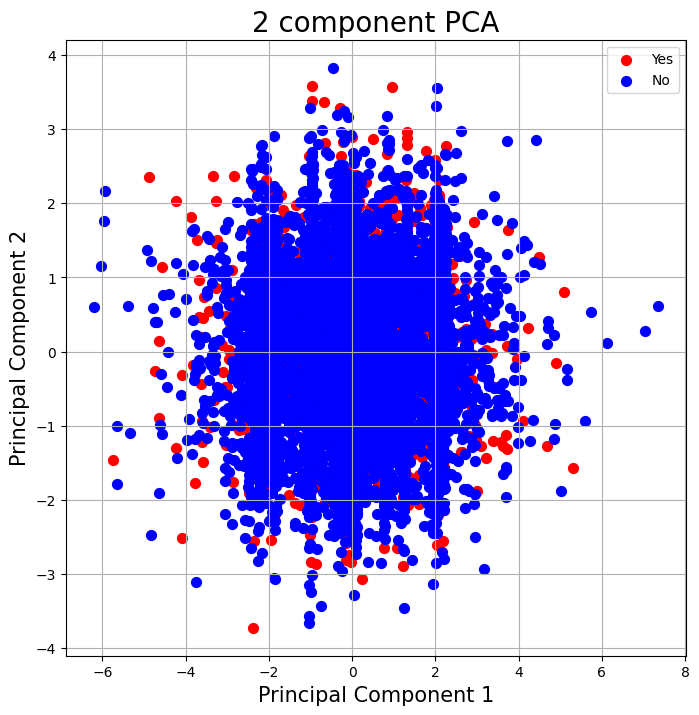

In [188]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Yes', 'No']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CHURN'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [189]:
finalDf.iloc[:, :2]

,principal component 1,principal component 2
0,0.059860,-0.209371
1,-1.295987,-0.561316
2,-1.929933,-0.961170
3,-1.824497,-0.013321
4,-0.982806,0.193007
...,...,...
9945,-0.880097,-0.621710
9946,-0.122144,0.624459
9947,0.382787,-0.632344
9948,0.688063,-0.115170


Text(0.5, 1.0, 'K=2, J=17714.31')

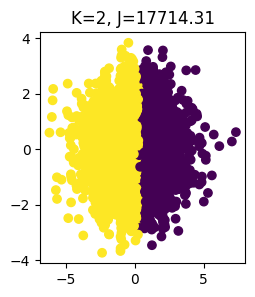

In [190]:
from sklearn import cluster
X =  finalDf.iloc[:, :2]
km2 = cluster.KMeans(n_clusters = 2).fit(X)

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

Text(0.5, 1.0, 'K=2, J=13384.22')

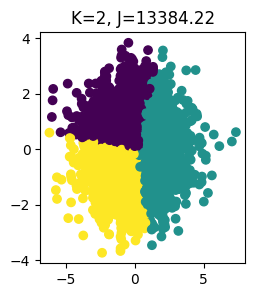

In [191]:
from sklearn import cluster
X =  finalDf.iloc[:, :2]
km2 = cluster.KMeans(n_clusters = 3).fit(X)

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

Text(0.5, 1.0, 'K=2, J=9788.93')

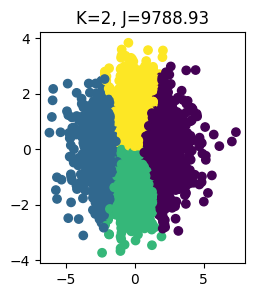

In [192]:
from sklearn import cluster
X =  finalDf.iloc[:, :2]
km2 = cluster.KMeans(n_clusters = 4).fit(X)

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

Text(0.5, 1.0, 'K=2, J=8119.45')

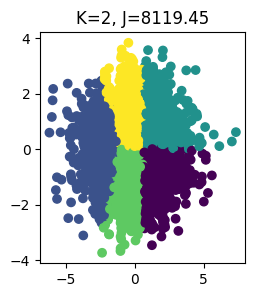

In [193]:
from sklearn import cluster
X =  finalDf.iloc[:, :2]
km2 = cluster.KMeans(n_clusters = 5).fit(X)

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)